## PROJECT 4 SPOTIFY

### PROJECT GOAL
Machine learning to study the behavior of subscribers and non-subscribers

#### Imports and Data uploads 

In [911]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    MultiLabelBinarizer, 
    StandardScaler,
    MinMaxScaler
)
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import numpy as np
from sklearn.metrics import silhouette_score
import hvplot.pandas
import holoviews as hv
from holoviews import dim, opts
hv.extension('bokeh')



In [912]:
# Load dataset
df = pd.read_csv("../Spotify/Resources/Spotify_data.csv")
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


## USER DEMOGRAPHIC - WHO ?

In [913]:
# STEP 1: Prepare the Data using only demographic columns
demographic_columns = [
    'Age', 'Gender', 'spotify_subscription_plan', 'premium_sub_willingness'
]
demo_df = df[demographic_columns].copy().dropna()
demo_df

,Age,Gender,spotify_subscription_plan,premium_sub_willingness
0,20-35,Female,Free (ad-supported),Yes
1,12-20,Male,Free (ad-supported),Yes
2,35-60,Others,Free (ad-supported),Yes
3,20-35,Female,Free (ad-supported),No
4,20-35,Female,Free (ad-supported),No
...,...,...,...,...
515,20-35,Female,Free (ad-supported),Yes
516,20-35,Female,Free (ad-supported),Yes
517,20-35,Female,Free (ad-supported),No
518,20-35,Female,Premium (paid subscription),Yes


In [914]:
# Create target variable - is_premium
demo_df['is_premium'] = demo_df['spotify_subscription_plan'].apply(
    lambda x: 1 if x == 'Premium (paid subscription)' else 0
)

In [915]:
# STEP 2: Data Preprocessing
# Separate features and target
X = demo_df.drop(['spotify_subscription_plan', 'is_premium'], axis=1)
y = demo_df['is_premium']

# Define preprocessing for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Age', 'Gender', 'premium_sub_willingness'])
    ])

([0, 1, 2, 3, 4],
 [Text(0, 0, '20-35'),
  Text(1, 0, '12-20'),
  Text(2, 0, '35-60'),
  Text(3, 0, '6-12'),
  Text(4, 0, '60+')])

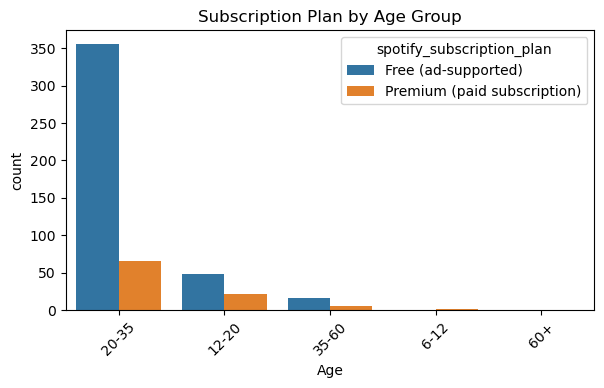

In [916]:
# STEP 3: Exploratory Data Analysis
demograph1 = plt.figure(figsize=(15, 8))

# Subscription distribution by age
plt.subplot(2, 2, 1)
sns.countplot(x='Age', hue='spotify_subscription_plan', data=demo_df)
plt.title('Subscription Plan by Age Group')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Subscription Plan by Gender')

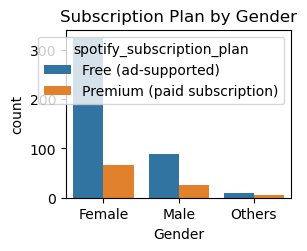

In [917]:
# Subscription distribution by gender
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', hue='spotify_subscription_plan', data=demo_df)
plt.title('Subscription Plan by Gender')

Text(0.5, 1.0, 'Willingness to Pay by Current Subscription')

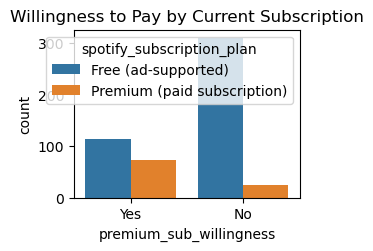

In [918]:
# Willingness to pay by subscription type
plt.subplot(2, 2, 3)
sns.countplot(x='premium_sub_willingness', hue='spotify_subscription_plan', data=demo_df)
plt.title('Willingness to Pay by Current Subscription')

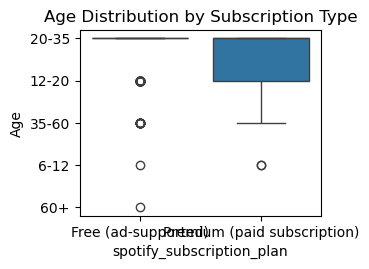

In [919]:
# Age distribution by subscription type
plt.subplot(2, 2, 4)
sns.boxplot(x='spotify_subscription_plan', y='Age', data=demo_df, 
            order=['Free (ad-supported)', 'Premium (paid subscription)'])
plt.title('Age Distribution by Subscription Type')

plt.tight_layout()
plt.show()



Model Performance (Premium vs Free):
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       124
           1       0.17      0.03      0.05        32

    accuracy                           0.77       156
   macro avg       0.48      0.50      0.46       156
weighted avg       0.66      0.77      0.70       156



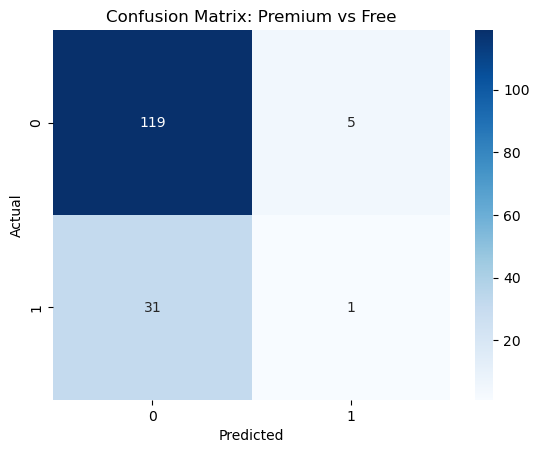

In [920]:
# STEP 4: Predictive Modeling - Premium vs Free Classification
# Create pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)
print("\nModel Performance (Premium vs Free):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Premium vs Free')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
# Get feature names after one-hot encoding
ohe_columns = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Age', 'Gender', 'premium_sub_willingness']))
feature_names = ohe_columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': pipeline.named_steps['classifier'].feature_importances_
}).sort_values('Importance', ascending=False)

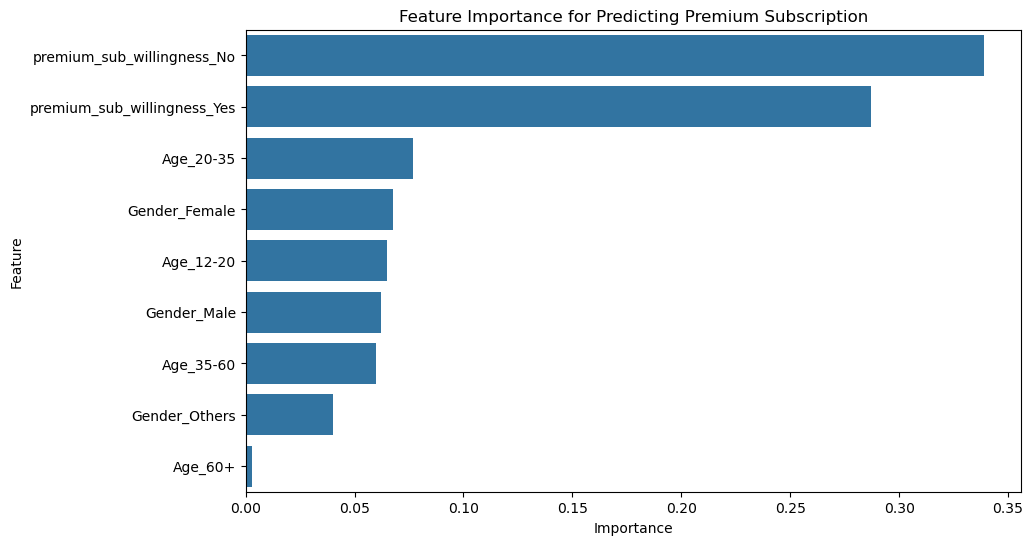

In [921]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Premium Subscription')
plt.show()


Cluster Summary:
         is_premium    Age  Gender premium_sub_willingness
cluster                                                   
0          0.050633  20-35  Female                      No
1          0.387640  20-35  Female                     Yes
2          0.142857  20-35    Male                      No


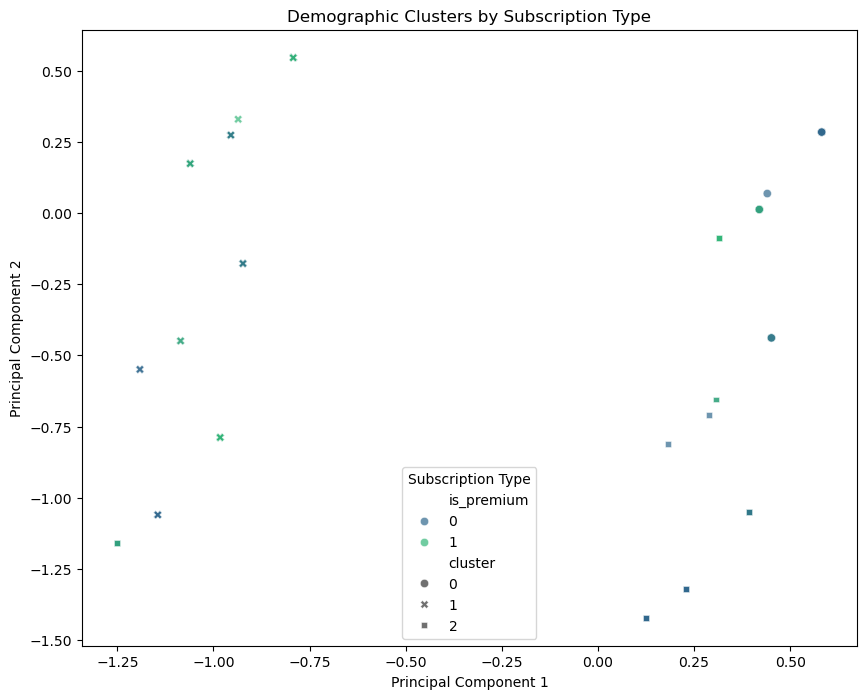

In [922]:
# STEP 5: Cluster Analysis of Demographic Groups
# Preprocess the data
X_processed = pipeline.named_steps['preprocessor'].transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# Add clusters to dataframe
demo_df['cluster'] = clusters

# Analyze cluster characteristics
cluster_summary = demo_df.groupby('cluster').agg({
    'is_premium': 'mean',
    'Age': lambda x: x.mode()[0],
    'Gender': lambda x: x.mode()[0],
    'premium_sub_willingness': lambda x: x.mode()[0]
})
print("\nCluster Summary:")
print(cluster_summary)

# PCA Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=demo_df['is_premium'], style=demo_df['cluster'],
                palette='viridis', alpha=0.7)
plt.title('Demographic Clusters by Subscription Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Subscription Type')
plt.show()

Key adjustments made:

Limited to Demographic Columns: The analysis now only uses the four specified demographic columns.

Simplified Preprocessing:

Only categorical features (Age, Gender, premium_sub_willingness) are one-hot encoded

No numerical scaling needed since we're only working with categorical data

Adjusted Visualizations:

Focused on demographic distributions and relationships

Added count plots showing subscription distribution across different demographics

Created a boxplot for age distribution comparison

Maintained Core Analysis:

Still predicts premium vs free subscription status

Performs clustering on demographic groups

Shows feature importance for predicting subscription type

Includes PCA visualization of demographic clusters

Interpretation Focus:

The analysis now specifically highlights how demographic factors relate to subscription status

Cluster analysis reveals natural groupings based purely on demographics

This streamlined version will help you understand:

Which demographic groups are more likely to have premium subscriptions

How willingness to pay relates to current subscription status

Natural demographic segments in your user base

The relative importance of different demographic factors in predicting subscription type

Analysis Approach:
Data Preparation:

One-hot encoding for categorical variables (Age, Gender)

Binary encoding for target variables (is_premium, willing_to_pay)

Exploratory Analysis:

Distribution of subscription types

Willingness to pay breakdown by demographics

Visualizations of key relationships

Cluster Analysis:

KMeans clustering to find natural groupings in the data

Analysis of cluster characteristics to identify patterns

Dimensionality Reduction:

PCA to visualize high-dimensional data in 2D space

Examine how premium/non-premium users are distributed

Predictive Modeling:

Random Forest classifier to predict willingness to pay

Evaluation of model performance

Feature importance analysis to understand key drivers

Key Insights You Might Find:
Demographic patterns in premium vs free users

Which age/gender groups are most likely to subscribe

How willingness to pay relates to actual subscription status

Whether there are distinct user segments with different behaviors

Which factors most strongly predict willingness to pay for premium

You can extend this analysis by:

Adding more demographic or behavioral features

Trying different clustering algorithms

Exploring more advanced classification models

Conducting statistical tests on the differences between groups

### DEMOGRAPHICS ANOTHER WAY 1

In [923]:
# Create combined position feature

def create_position(row):
    current = row['spotify_subscription_plan']
    willing = row['premium_sub_willingness']
    
    if current == 'Premium (paid subscription)':
        return 'Happy Premium'
    elif current == 'Free (ad-supported)' and willing == 'Yes':
        return 'Willing Free'
    elif current == 'Free (ad-supported)' and willing == 'No':
        return 'Resistant Free'
    else:
        return 'Undecided'


demo_df['position_on_subscription'] = demo_df.apply(create_position, axis=1)
demo_df

,Age,Gender,spotify_subscription_plan,premium_sub_willingness,is_premium,cluster,position_on_subscription
0,20-35,Female,Free (ad-supported),Yes,0,1,Willing Free
1,12-20,Male,Free (ad-supported),Yes,0,2,Willing Free
2,35-60,Others,Free (ad-supported),Yes,0,1,Willing Free
3,20-35,Female,Free (ad-supported),No,0,0,Resistant Free
4,20-35,Female,Free (ad-supported),No,0,0,Resistant Free
...,...,...,...,...,...,...,...
515,20-35,Female,Free (ad-supported),Yes,0,1,Willing Free
516,20-35,Female,Free (ad-supported),Yes,0,1,Willing Free
517,20-35,Female,Free (ad-supported),No,0,0,Resistant Free
518,20-35,Female,Premium (paid subscription),Yes,1,1,Happy Premium


([0, 1, 2, 3],
 [Text(0, 0, 'Happy Premium'),
  Text(1, 0, 'Willing Free'),
  Text(2, 0, 'Resistant Free'),
  Text(3, 0, 'Undecided')])

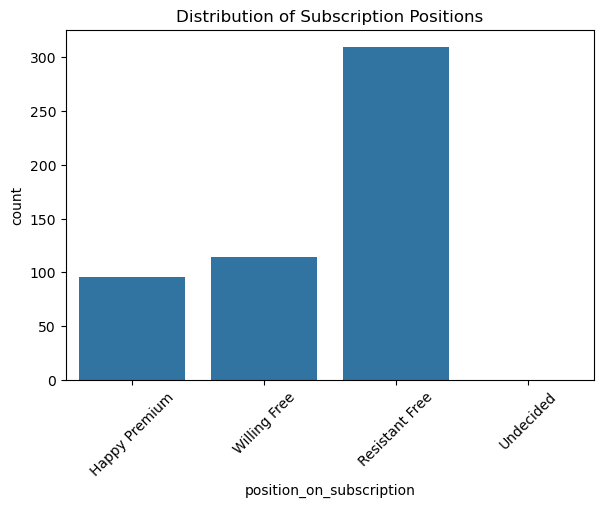

In [924]:
# STEP 2: Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# Distribution of positions
plt.subplot(2, 2, 1)
sns.countplot(x='position_on_subscription', data=demo_df, 
              order=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'])
plt.title('Distribution of Subscription Positions')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, '20-35'),
  Text(1, 0, '12-20'),
  Text(2, 0, '35-60'),
  Text(3, 0, '6-12'),
  Text(4, 0, '60+')])

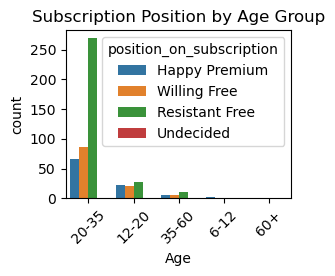

In [925]:
# Position by age group
plt.subplot(2, 2, 2)
sns.countplot(x='Age', hue='position_on_subscription', data=demo_df,
              hue_order=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'])
plt.title('Subscription Position by Age Group')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Subscription Position by Gender')

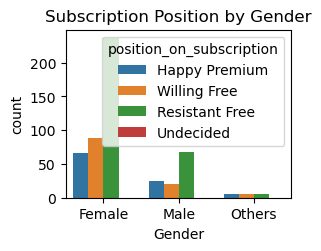

In [926]:
# Position by gender
plt.subplot(2, 2, 3)
sns.countplot(x='Gender', hue='position_on_subscription', data=demo_df,
              hue_order=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'])
plt.title('Subscription Position by Gender')

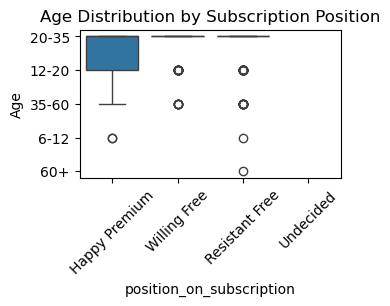

In [927]:
# Age distribution by position
plt.subplot(2, 2, 4)
sns.boxplot(x='position_on_subscription', y='Age', data=demo_df,
            order=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'])
plt.title('Age Distribution by Subscription Position')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [928]:
# STEP 3: Data Preprocessing for ML
# Separate features and target
X = demo_df[['Age', 'Gender']]
y = demo_df['position_on_subscription']

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Age', 'Gender'])
    ])

In [929]:
# STEP 4: Predictive Modeling - Position Classification
# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)
print("\nModel Performance (Position Prediction):")
print(classification_report(y_test, y_pred))


Model Performance (Position Prediction):
                precision    recall  f1-score   support

 Happy Premium       0.45      0.28      0.35        32
Resistant Free       0.64      0.90      0.75        92
  Willing Free       0.00      0.00      0.00        32

      accuracy                           0.59       156
     macro avg       0.36      0.39      0.36       156
  weighted avg       0.47      0.59      0.51       156



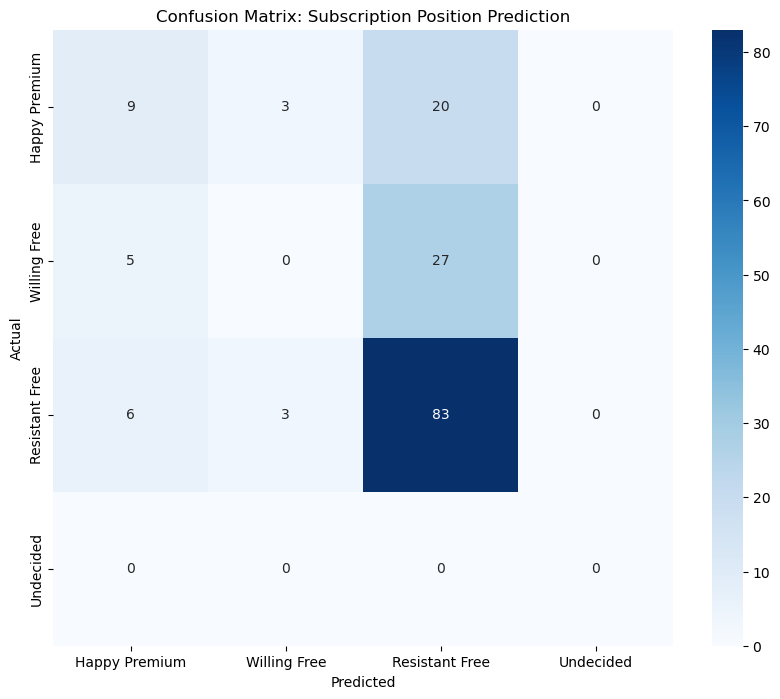

In [930]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, 
                      labels=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'],
            yticklabels=['Happy Premium', 'Willing Free', 'Resistant Free', 'Undecided'])
plt.title('Confusion Matrix: Subscription Position Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

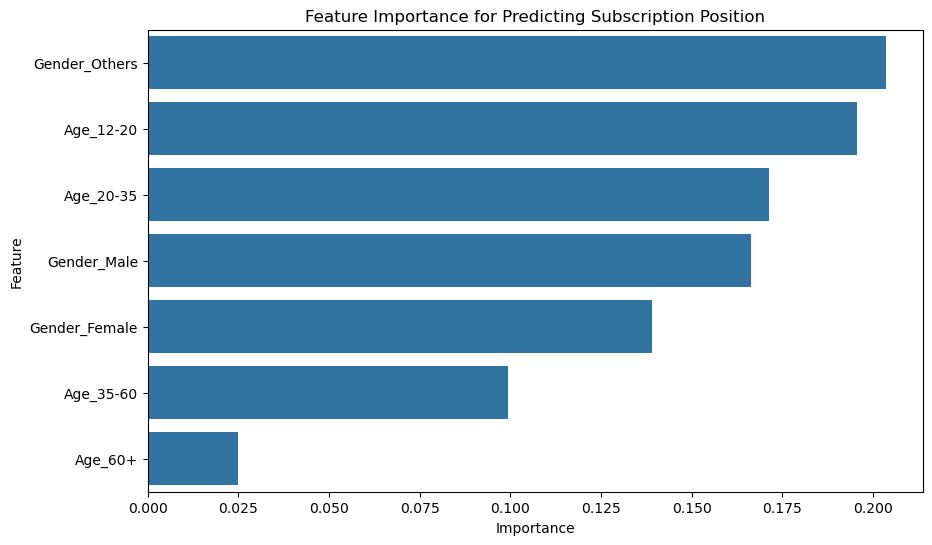

In [931]:
# Feature Importance
ohe_columns = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Age', 'Gender']))
feature_names = ohe_columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': pipeline.named_steps['classifier'].feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Subscription Position')
plt.show()

In [932]:
# STEP 5: Cluster Analysis
# Preprocess the data
X_processed = pipeline.named_steps['preprocessor'].transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# Add clusters to dataframe
demo_df['cluster'] = clusters

# Analyze cluster characteristics
cluster_summary = demo_df.groupby('cluster').agg({
    'position_on_subscription': lambda x: x.mode()[0],
    'Age': lambda x: x.mode()[0],
    'Gender': lambda x: x.mode()[0]
})
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
        position_on_subscription    Age  Gender
cluster                                        
0                 Resistant Free  20-35  Female
1                 Resistant Free  20-35    Male
2                  Happy Premium  12-20  Female
3                 Resistant Free  12-20    Male


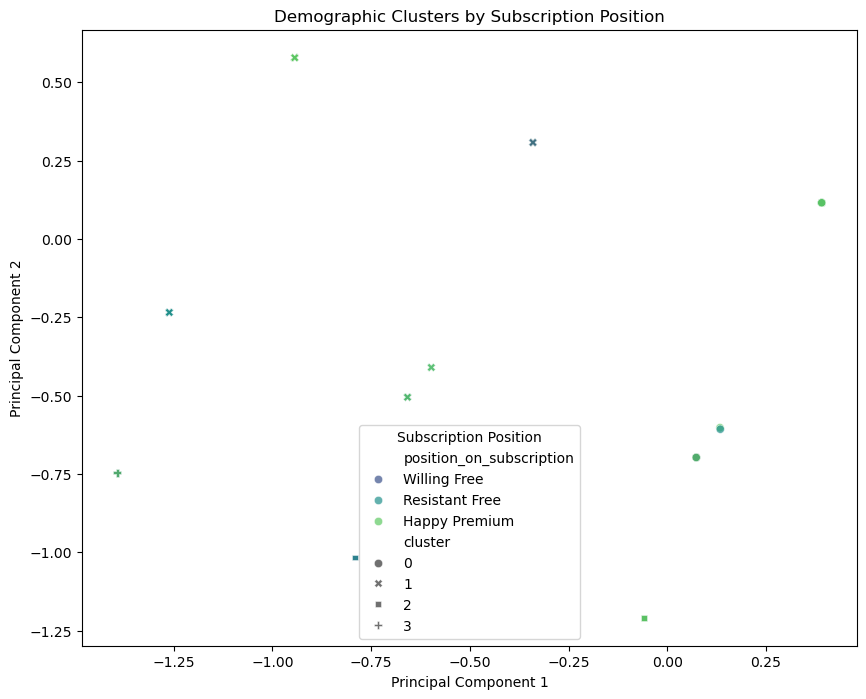

In [933]:
# PCA Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=demo_df['position_on_subscription'], style=demo_df['cluster'],
                palette='viridis', alpha=0.7)
plt.title('Demographic Clusters by Subscription Position')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Subscription Position')
plt.show()

Key improvements in this version:

Composite Feature Creation:

Combined spotify_subscription_plan and premium_sub_willingness into a new position_on_subscription column with 4 categories:

'Happy Premium': Current premium subscribers

'Willing Free': Free users willing to upgrade

'Resistant Free': Free users not willing to upgrade

'Undecided': Other cases (if any)

Enhanced Visualizations:

Added specific plots showing the distribution of the new position categories

Visualized how positions vary by age and gender

Created a boxplot showing age distributions across positions

Machine Learning Focus:

Changed the prediction target to the new position categories

Updated evaluation metrics to handle multi-class classification

Adjusted confusion matrix to show all position categories

Cluster Analysis:

Now examines how natural demographic clusters relate to subscription positions

Uses PCA to visualize the relationship between demographics and positions

Interpretation:

The analysis now reveals which demographic factors predict different subscription positions

Shows which groups are most likely to be conversion targets (Willing Free)

Identifies demographics resistant to premium subscriptions

This approach provides more nuanced insights than just premium vs free analysis, helping identify:

Potential premium conversion targets (Willing Free users)

Groups that might need different marketing approaches

Demographic patterns among satisfied premium users

Characteristics of resistant free users

### INTERACTION WITH APP - HOW ?

In [934]:
interaction_columns = [
    'spotify_usage_period',
    'music_time_slot',
    'music_lis_frequency',
    'music_recc_rating',
    'spotify_listening_device',
    'spotify_subscription_plan',
    'premium_sub_willingness',
    
]

interaction_df = df[interaction_columns].copy().fillna("None")
interaction_df.head(20)

,spotify_usage_period,music_time_slot,music_lis_frequency,music_recc_rating,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness
0,More than 2 years,Night,leisure time,3,Smart speakers or voice assistants,Free (ad-supported),Yes
1,More than 2 years,Afternoon,Workout session,2,Computer or laptop,Free (ad-supported),Yes
2,6 months to 1 year,Night,"Study Hours, While Traveling",4,Smart speakers or voice assistants,Free (ad-supported),Yes
3,1 year to 2 years,Night,"Office hours, Workout session, leisure time",4,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No
4,1 year to 2 years,Night,leisure time,4,Smartphone,Free (ad-supported),No
5,More than 2 years,Night,Workout session,3,Smartphone,Free (ad-supported),No
6,1 year to 2 years,Morning,Office hours,3,Smartphone,Free (ad-supported),No
7,Less than 6 months,Night,leisure time,5,Smartphone,Free (ad-supported),No
8,Less than 6 months,Afternoon,"While Traveling, leisure time",4,Smartphone,Free (ad-supported),Yes
9,More than 2 years,Night,"Office hours, While Traveling, Workout session",4,Smartphone,Free (ad-supported),No


In [935]:
# created the number of devides colunn based on the 
interaction_df['number_of_devices'] = df['spotify_listening_device'].apply(
    lambda x: float(x.count(',') + 1)  # Count commas and add 1
)

# Verify the results
interaction_df.head(50)

,spotify_usage_period,music_time_slot,music_lis_frequency,music_recc_rating,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,number_of_devices
0,More than 2 years,Night,leisure time,3,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0
1,More than 2 years,Afternoon,Workout session,2,Computer or laptop,Free (ad-supported),Yes,1.0
2,6 months to 1 year,Night,"Study Hours, While Traveling",4,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0
3,1 year to 2 years,Night,"Office hours, Workout session, leisure time",4,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,2.0
4,1 year to 2 years,Night,leisure time,4,Smartphone,Free (ad-supported),No,1.0
5,More than 2 years,Night,Workout session,3,Smartphone,Free (ad-supported),No,1.0
6,1 year to 2 years,Morning,Office hours,3,Smartphone,Free (ad-supported),No,1.0
7,Less than 6 months,Night,leisure time,5,Smartphone,Free (ad-supported),No,1.0
8,Less than 6 months,Afternoon,"While Traveling, leisure time",4,Smartphone,Free (ad-supported),Yes,1.0
9,More than 2 years,Night,"Office hours, While Traveling, Workout session",4,Smartphone,Free (ad-supported),No,1.0


In [936]:
# Create the new column
interaction_df['number_of_music_lis_contexts'] = interaction_df['music_lis_frequency'].apply(
    lambda x: float(x.count(',') + 1) if pd.notna(x) else 0.0
)

interaction_df.head(50)

,spotify_usage_period,music_time_slot,music_lis_frequency,music_recc_rating,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,number_of_devices,number_of_music_lis_contexts
0,More than 2 years,Night,leisure time,3,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0,1.0
1,More than 2 years,Afternoon,Workout session,2,Computer or laptop,Free (ad-supported),Yes,1.0,1.0
2,6 months to 1 year,Night,"Study Hours, While Traveling",4,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0,2.0
3,1 year to 2 years,Night,"Office hours, Workout session, leisure time",4,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,2.0,3.0
4,1 year to 2 years,Night,leisure time,4,Smartphone,Free (ad-supported),No,1.0,1.0
5,More than 2 years,Night,Workout session,3,Smartphone,Free (ad-supported),No,1.0,1.0
6,1 year to 2 years,Morning,Office hours,3,Smartphone,Free (ad-supported),No,1.0,1.0
7,Less than 6 months,Night,leisure time,5,Smartphone,Free (ad-supported),No,1.0,1.0
8,Less than 6 months,Afternoon,"While Traveling, leisure time",4,Smartphone,Free (ad-supported),Yes,1.0,2.0
9,More than 2 years,Night,"Office hours, While Traveling, Workout session",4,Smartphone,Free (ad-supported),No,1.0,3.0


In [937]:
def transform_usage_period(period):
    if period == 'More than 2 years':
        return '2+'
    elif period == '1 year to 2 years':
        return '1-2'
    elif period == '6 months to 1 year':
        return '0.5-1'
    elif period == 'Less than 6 months':
        return '0-0.5'
    else:
        return period  # handles any unexpected values

interaction_df['spotify_usage_period'] = interaction_df['spotify_usage_period'].apply(transform_usage_period)
interaction_df

,spotify_usage_period,music_time_slot,music_lis_frequency,music_recc_rating,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,number_of_devices,number_of_music_lis_contexts
0,2+,Night,leisure time,3,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0,1.0
1,2+,Afternoon,Workout session,2,Computer or laptop,Free (ad-supported),Yes,1.0,1.0
2,0.5-1,Night,"Study Hours, While Traveling",4,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0,2.0
3,1-2,Night,"Office hours, Workout session, leisure time",4,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,2.0,3.0
4,1-2,Night,leisure time,4,Smartphone,Free (ad-supported),No,1.0,1.0
...,...,...,...,...,...,...,...,...,...
515,2+,Morning,While Traveling,5,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,3.0,1.0
516,2+,Night,"While Traveling, Workout session, leisure time",2,"Smartphone, Computer or laptop",Free (ad-supported),Yes,2.0,3.0
517,2+,Night,leisure time,3,Smartphone,Free (ad-supported),No,1.0,1.0
518,0.5-1,Night,"Workout session, leisure time",2,Smartphone,Premium (paid subscription),Yes,1.0,2.0


In [938]:
# First, let's prepare the data
# Convert subscription plan to binary (1 for Premium, 0 for Free)
interaction_df['is_premium'] = interaction_df['spotify_subscription_plan'].apply(
    lambda x: 0 if 'Free' in x else 1)
interaction_df

,spotify_usage_period,music_time_slot,music_lis_frequency,music_recc_rating,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,number_of_devices,number_of_music_lis_contexts,is_premium
0,2+,Night,leisure time,3,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0,1.0,0
1,2+,Afternoon,Workout session,2,Computer or laptop,Free (ad-supported),Yes,1.0,1.0,0
2,0.5-1,Night,"Study Hours, While Traveling",4,Smart speakers or voice assistants,Free (ad-supported),Yes,1.0,2.0,0
3,1-2,Night,"Office hours, Workout session, leisure time",4,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,2.0,3.0,0
4,1-2,Night,leisure time,4,Smartphone,Free (ad-supported),No,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
515,2+,Morning,While Traveling,5,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,3.0,1.0,0
516,2+,Night,"While Traveling, Workout session, leisure time",2,"Smartphone, Computer or laptop",Free (ad-supported),Yes,2.0,3.0,0
517,2+,Night,leisure time,3,Smartphone,Free (ad-supported),No,1.0,1.0,0
518,0.5-1,Night,"Workout session, leisure time",2,Smartphone,Premium (paid subscription),Yes,1.0,2.0,1


In [939]:
# 1. Basic Comparison Statistics
print("\nBasic Statistics Comparison:")
print(interaction_df.groupby('is_premium').agg({
    'music_recc_rating': ['mean', 'median'],
    'spotify_usage_period': lambda x: x.value_counts().index[0]
}))


Basic Statistics Comparison:
           music_recc_rating        spotify_usage_period
                        mean median             <lambda>
is_premium                                              
0                   3.584906    4.0                   2+
1                   3.145833    3.0                   2+


In [940]:
# 2. Visualization of Key Differences
# Usage period comparison
usage_period_plot = (interaction_df.groupby(['is_premium', 'spotify_usage_period'])
                    .size()
                    .unstack()
                    .hvplot.bar(
                        title='Usage Period by Subscription Type',
                        xlabel='Subscription Type (0=Free, 1=Premium)',
                        ylabel='Count',
                        rot=45,
                        height=400,
                        width=600
                    ))
usage_period_plot

:Bars   [is_premium,spotify_usage_period]   (value)

In [941]:
# Time slot comparison
time_slot_plot = (interaction_df.groupby(['is_premium', 'music_time_slot'])
                 .size()
                 .unstack()
                 .hvplot.bar(
                     title='Listening Time Slots by Subscription Type',
                     xlabel='Subscription Type (0=Free, 1=Premium)',
                     ylabel='Count',
                     rot=45,
                     height=400,
                     width=600
                 ))
time_slot_plot

:Bars   [is_premium,music_time_slot]   (value)

In [942]:
# Device usage comparison
device_plot = (interaction_df['spotify_listening_device'].str.split(', ')
               .explode()
               .to_frame()
               .join(interaction_df['is_premium'])
               .groupby(['is_premium', 'spotify_listening_device'])
               .size()
               .unstack()
               .hvplot.bar(
                   title='Device Usage by Subscription Type',
                   xlabel='Subscription Type (0=Free, 1=Premium)',
                   ylabel='Count',
                   rot=45,
                   height=400,
                   width=600
               ))
device_plot

:Bars   [is_premium,spotify_listening_device]   (value)

In [943]:
interaction_quan_columns = ['spotify_usage_period',	'music_time_slot', 'music_recc_rating','premium_sub_willingness', 'number_of_devices', 'number_of_music_lis_contexts', 'is_premium']
interaction_quan_df = interaction_df[interaction_quan_columns].copy().fillna("None")
interaction_quan_df

,spotify_usage_period,music_time_slot,music_recc_rating,premium_sub_willingness,number_of_devices,number_of_music_lis_contexts,is_premium
0,2+,Night,3,Yes,1.0,1.0,0
1,2+,Afternoon,2,Yes,1.0,1.0,0
2,0.5-1,Night,4,Yes,1.0,2.0,0
3,1-2,Night,4,No,2.0,3.0,0
4,1-2,Night,4,No,1.0,1.0,0
...,...,...,...,...,...,...,...
515,2+,Morning,5,Yes,3.0,1.0,0
516,2+,Night,2,Yes,2.0,3.0,0
517,2+,Night,3,No,1.0,1.0,0
518,0.5-1,Night,2,Yes,1.0,2.0,1


In [944]:
# Identify categorical columns (non-numeric or with text values)
categorical_cols = ['spotify_usage_period', 'music_time_slot', 'premium_sub_willingness']

# Get dummies for categorical columns (drop_first=True to avoid dummy variable trap)
interaction_quan_dummies = pd.get_dummies(
    interaction_quan_df, 
    columns=categorical_cols,
    drop_first=True,  # Reduces multicollinearity
    dtype=int  # Converts dummy values to 0/1 as integers
)

# Verify the results
interaction_quan_dummies

,music_recc_rating,number_of_devices,number_of_music_lis_contexts,is_premium,spotify_usage_period_0.5-1,spotify_usage_period_1-2,spotify_usage_period_2+,music_time_slot_Morning,music_time_slot_Night,premium_sub_willingness_Yes
0,3,1.0,1.0,0,0,0,1,0,1,1
1,2,1.0,1.0,0,0,0,1,0,0,1
2,4,1.0,2.0,0,1,0,0,0,1,1
3,4,2.0,3.0,0,0,1,0,0,1,0
4,4,1.0,1.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
515,5,3.0,1.0,0,0,0,1,1,0,1
516,2,2.0,3.0,0,0,0,1,0,1,1
517,3,1.0,1.0,0,0,0,1,0,1,0
518,2,1.0,2.0,1,1,0,0,0,1,1


In [945]:
# 3. Predictive Modeling to Identify Key Differences
# Prepare features
X = interaction_quan_dummies.drop('is_premium', axis=1)
y = interaction_quan_dummies['is_premium']

In [946]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class balance
)

In [947]:
# Since all features are already preprocessed (dummies + numeric),
# we only need to scale numeric features
numeric_cols = ['music_recc_rating', 'number_of_devices', 'number_of_music_lis_contexts']
other_cols = [col for col in X.columns if col not in numeric_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('pass', 'passthrough', other_cols)  # Leave dummies unchanged
    ])

In [948]:
# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['music_recc_rating',
                                                   'number_of_devices',
                                                   'number_of_music_lis_contexts']),
                                                 ('pass', 'passthrough',
                                                  ['spotify_usage_period_0.5-1',
                                                   'spotify_usage_period_1-2',
                                                   'spotify_usage_period_2+',
                                                   'music_time_slot_Morning',
                                                   'music_time_slot_Night',
                                                   'premium_sub_willingness_Yes'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [949]:
# Evaluate
print("\nModel Evaluation:")
print(f"Train Accuracy: {pipeline.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {pipeline.score(X_test, y_test):.2f}")

# Feature importance (simplified version)
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': pipeline.named_steps['classifier'].feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features for Predicting Premium Subscription:")
print(feature_importances.head(10))


Model Evaluation:
Train Accuracy: 0.91
Test Accuracy: 0.79

Top 10 Important Features for Predicting Premium Subscription:
                        feature  importance
8   premium_sub_willingness_Yes    0.236437
0             music_recc_rating    0.207865
2  number_of_music_lis_contexts    0.146368
1             number_of_devices    0.131339
7         music_time_slot_Night    0.074998
6       music_time_slot_Morning    0.064014
4      spotify_usage_period_1-2    0.049633
5       spotify_usage_period_2+    0.047855
3    spotify_usage_period_0.5-1    0.041491


In [950]:
# Confusion matrix
y_pred = pipeline.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[77  8]
 [14  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        85
           1       0.38      0.26      0.31        19

    accuracy                           0.79       104
   macro avg       0.62      0.58      0.59       104
weighted avg       0.76      0.79      0.77       104



In [951]:
# 4. Cluster Analysis to Identify User Segments
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import matplotlib.pyplot as plt

In [952]:
# Use the same preprocessor from the pipeline to ensure consistency
X_processed = pipeline.named_steps['preprocessor'].transform(X)  # Reuse fitted preprocessor

# Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)

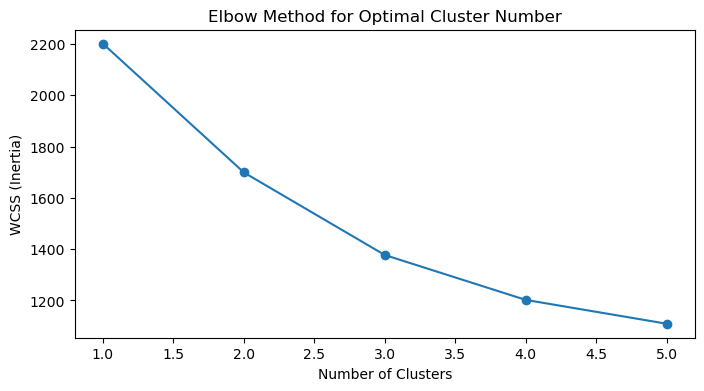

In [953]:
# Determine optimal clusters using Elbow Method (optional but recommended)
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,6), wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [954]:
# K-means clustering (using n_clusters=3 as per your original code)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_processed)

# Create cluster visualization DataFrame
cluster_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': clusters,
    'Subscription': y.map({1: 'Premium', 0: 'Free'}),  # Map to readable labels
    'Devices': interaction_quan_dummies['number_of_devices'],
    'Usage': interaction_quan_df['spotify_usage_period']  # Original categorical values
})

In [955]:
# Interactive cluster plot
cluster_plot = cluster_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['Subscription', 'Devices', 'Usage'],
    title='User Clusters by Behavior (Colored by Cluster)',
    height=500,
    width=700,
    alpha=0.7,
    size=100
)
cluster_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Subscription,Devices,Usage)

In [956]:
# Analyze cluster characteristics
cluster_summary = pd.concat([
    interaction_quan_dummies.groupby(clusters).mean(),
    pd.Series(clusters).value_counts().rename('Count')
], axis=1)

print("\nCluster Characteristics Summary:")
display(cluster_summary)


Cluster Characteristics Summary:


,music_recc_rating,number_of_devices,number_of_music_lis_contexts,is_premium,spotify_usage_period_0.5-1,spotify_usage_period_1-2,spotify_usage_period_2+,music_time_slot_Morning,music_time_slot_Night,premium_sub_willingness_Yes,Count
0,3.557895,2.273684,2.957895,0.252632,0.168421,0.273684,0.473684,0.221053,0.600000,0.368421,95
1,2.652582,1.079812,1.399061,0.220657,0.323944,0.281690,0.220657,0.211268,0.427230,0.413146,213
2,4.334906,1.061321,1.641509,0.117925,0.160377,0.259434,0.363208,0.117925,0.773585,0.297170,212


<Figure size 1200x600 with 0 Axes>

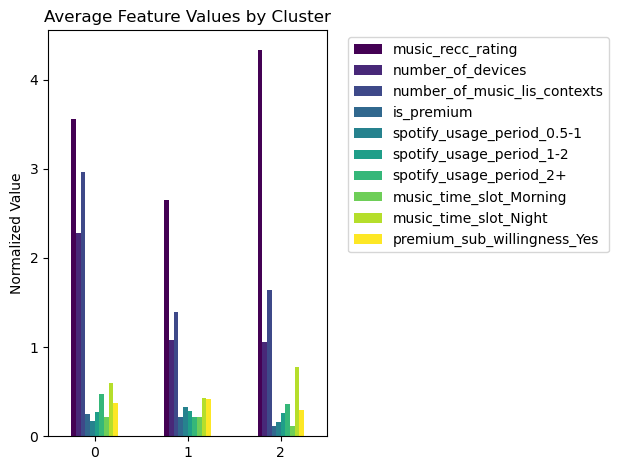

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Subscription,Devices,Usage)

In [957]:
# Plot cluster means for key features
plt.figure(figsize=(12,6))
cluster_summary.drop('Count', axis=1).plot(kind='bar', cmap='viridis')
plt.title('Average Feature Values by Cluster')
plt.ylabel('Normalized Value')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Show the interactive plot
cluster_plot

### CONTENT - What Are They Listening to?

In [958]:
content_columns = [
    'preferred_listening_content', 
    'fav_music_genre', 
    'music_Influencial_mood', 
    'spotify_subscription_plan',
    'premium_sub_willingness'
]

content_df = df[content_columns].copy().dropna()
content_df.head(50)

,preferred_listening_content,fav_music_genre,music_Influencial_mood,spotify_subscription_plan,premium_sub_willingness
0,Podcast,Melody,Sadness or melancholy,Free (ad-supported),Yes
1,Podcast,Rap,Social gatherings or parties,Free (ad-supported),Yes
2,Podcast,Pop,Relaxation and stress relief,Free (ad-supported),Yes
3,Music,Melody,"Relaxation and stress relief, Social gathering...",Free (ad-supported),No
4,Music,Melody,Relaxation and stress relief,Free (ad-supported),No
5,Music,Pop,Uplifting and motivational,Free (ad-supported),No
6,Music,Melody,Relaxation and stress relief,Free (ad-supported),No
7,Music,Melody,Social gatherings or parties,Free (ad-supported),No
8,Music,Melody,"Relaxation and stress relief, Uplifting and mo...",Free (ad-supported),Yes
9,Music,Melody,Relaxation and stress relief,Free (ad-supported),No


In [959]:
# Prepare the data
# Convert categorical features to numerical using Label Encoding
label_encoders = {}
content_df_encoded = content_df.copy()

for column in ['preferred_listening_content', 'fav_music_genre', 'spotify_subscription_plan', 'premium_sub_willingness']:
    le = LabelEncoder()
    content_df_encoded[column] = le.fit_transform(content_df[column])
    label_encoders[column] = le

In [960]:
# Split mood categories into separate binary columns (multi-label encoding)
mood_categories = set()
for moods in content_df['music_Influencial_mood'].str.split(', '):
    if isinstance(moods, list):
        for mood in moods:
            mood_categories.add(mood.strip())
    else:
        mood_categories.add(moods)

for mood in mood_categories:
    content_df_encoded[mood] = content_df['music_Influencial_mood'].str.contains(mood).astype(int)

In [961]:
# Drop the original mood column
content_df_encoded.drop('music_Influencial_mood', axis=1, inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(content_df_encoded)

In [962]:
# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

In [963]:
# Plot the Elbow curve
elbow_plot = pd.DataFrame({'k': k_range, 'inertia': inertia}).hvplot.line(
    x='k', y='inertia', 
    title='Elbow Method for Optimal k',
    xticks=k_range,
    width=600, height=400
)

In [964]:
# Based on the elbow plot, let's choose 3 clusters (you may adjust based on your elbow point)
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters back to the original dataframe
content_df['cluster'] = clusters

# Evaluate clustering quality
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.28


In [965]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
content_df['pca1'] = principal_components[:, 0]
content_df['pca2'] = principal_components[:, 1]

In [966]:
# Create interactive cluster visualization
cluster_plot = content_df.hvplot.scatter(
    x='pca1', y='pca2', 
    by='cluster',
    hover_cols=['preferred_listening_content', 'fav_music_genre', 'spotify_subscription_plan'],
    title='K-Means Clustering of Spotify Users (PCA-reduced)',
    width=700, height=500
)

In [967]:
# Analyze cluster characteristics by subscription plan
subscription_analysis = content_df.groupby(['cluster', 'spotify_subscription_plan']).size().unstack().fillna(0)
subscription_plot = subscription_analysis.hvplot.bar(
    title='Cluster Distribution by Subscription Plan',
    stacked=True,
    xlabel='Cluster',
    ylabel='Count',
    width=600, height=400,
    rot=45
)


In [968]:
# Analyze premium willingness by cluster
willingness_analysis = content_df.groupby(['cluster', 'premium_sub_willingness']).size().unstack().fillna(0)
willingness_plot = willingness_analysis.hvplot.bar(
    title='Premium Subscription Willingness by Cluster',
    stacked=True,
    xlabel='Cluster',
    ylabel='Count',
    width=600, height=400,
    rot=45
)

In [969]:
# Analyze music genre preferences by cluster
genre_analysis = content_df.groupby(['cluster', 'fav_music_genre']).size().unstack().fillna(0)
genre_plot = genre_analysis.hvplot.bar(
    title='Music Genre Preferences by Cluster',
    stacked=True,
    xlabel='Cluster',
    ylabel='Count',
    width=600, height=400,
    rot=45
)

In [970]:
cluster_plot

:NdOverlay   [cluster]
   :Scatter   [pca1]   (pca2,preferred_listening_content,fav_music_genre,spotify_subscription_plan)

In [971]:
subscription_plot 

:Bars   [cluster,spotify_subscription_plan]   (value)

In [972]:
willingness_plot

:Bars   [cluster,premium_sub_willingness]   (value)

In [973]:
genre_plot

:Bars   [cluster,fav_music_genre]   (value)

Analysis Interpretation
This code performs the following analysis:

Data Preparation:

Encodes categorical variables (content type, genre, subscription plan)

Explodes the multi-label mood categories into binary columns

Standardizes the data for K-Means clustering

Cluster Analysis:

Uses the Elbow Method to determine optimal cluster count

Performs K-Means clustering with the selected k

Reduces dimensions with PCA for visualization

Visualizations:

Interactive cluster plot showing how users group together

Subscription plan distribution across clusters

Willingness to pay for premium across clusters

Music genre preferences by cluster

Key Insights to Look For:
Subscriber vs Non-subscriber Patterns:

Are there clusters dominated by premium subscribers?

Do free users show distinct content/genre/mood preferences?

Conversion Opportunities:

Clusters with high willingness to pay but currently on free plan

Content preferences that might drive premium conversions

Behavioral Segments:

Podcast-focused listeners vs music listeners

Mood/genre combinations that define distinct user segments

You can further refine this analysis by:

Trying different numbers of clusters

Adding more features if available

Performing statistical tests on cluster characteristics

Creating targeted marketing strategies for each cluster

In [974]:
content_df['position_on_subscription'] = demo_df.apply(create_position, axis=1)
content_df

,preferred_listening_content,fav_music_genre,music_Influencial_mood,spotify_subscription_plan,premium_sub_willingness,cluster,pca1,pca2,position_on_subscription
0,Podcast,Melody,Sadness or melancholy,Free (ad-supported),Yes,2,-1.940427,-0.474497,Willing Free
1,Podcast,Rap,Social gatherings or parties,Free (ad-supported),Yes,2,-1.935644,0.198771,Willing Free
2,Podcast,Pop,Relaxation and stress relief,Free (ad-supported),Yes,2,-0.802175,-1.404911,Willing Free
3,Music,Melody,"Relaxation and stress relief, Social gathering...",Free (ad-supported),No,0,1.702592,1.058911,Resistant Free
4,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,0,1.578713,-0.798978,Resistant Free
...,...,...,...,...,...,...,...,...,...
515,Music,Pop,"Uplifting and motivational, Sadness or melancholy",Free (ad-supported),Yes,2,-1.551067,0.812667,Willing Free
516,Music,Pop,"Relaxation and stress relief, Uplifting and mo...",Free (ad-supported),Yes,0,-0.375791,2.837293,Willing Free
517,Music,Pop,Relaxation and stress relief,Free (ad-supported),No,0,1.166805,-0.973918,Resistant Free
518,Music,Melody,"Relaxation and stress relief, Uplifting and mo...",Premium (paid subscription),Yes,1,-0.484379,0.682009,Happy Premium


# CONTENT ANOTHER WAY

In [975]:
content_num_columns = [	'preferred_listening_content', 
                       'fav_music_genre', 
                       'music_Influencial_mood',
                       'spotify_subscription_plan',
                       'premium_sub_willingness',
                       'position_on_subscription'] 

content_clean_df = content_df[content_num_columns].copy().dropna()
content_clean_df.head()


,preferred_listening_content,fav_music_genre,music_Influencial_mood,spotify_subscription_plan,premium_sub_willingness,position_on_subscription
0,Podcast,Melody,Sadness or melancholy,Free (ad-supported),Yes,Willing Free
1,Podcast,Rap,Social gatherings or parties,Free (ad-supported),Yes,Willing Free
2,Podcast,Pop,Relaxation and stress relief,Free (ad-supported),Yes,Willing Free
3,Music,Melody,"Relaxation and stress relief, Social gathering...",Free (ad-supported),No,Resistant Free
4,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free


In [976]:
# created mood variety colunn based on the 
content_clean_df['mood_variety'] = content_clean_df['music_Influencial_mood'].apply(
    lambda x: float(x.count(',') + 1)  # Count commas and add 1
)

# Verify the results
content_clean_df.head()

,preferred_listening_content,fav_music_genre,music_Influencial_mood,spotify_subscription_plan,premium_sub_willingness,position_on_subscription,mood_variety
0,Podcast,Melody,Sadness or melancholy,Free (ad-supported),Yes,Willing Free,1.0
1,Podcast,Rap,Social gatherings or parties,Free (ad-supported),Yes,Willing Free,1.0
2,Podcast,Pop,Relaxation and stress relief,Free (ad-supported),Yes,Willing Free,1.0
3,Music,Melody,"Relaxation and stress relief, Social gathering...",Free (ad-supported),No,Resistant Free,2.0
4,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free,1.0


In [977]:
# created genre variety colunn based on the 
content_clean_df['genre_variety'] = content_clean_df['fav_music_genre'].apply(
    lambda x: float(x.count(',') + 1)  # Count commas and add 1
)

# Verify the results
content_clean_df.head(20)

,preferred_listening_content,fav_music_genre,music_Influencial_mood,spotify_subscription_plan,premium_sub_willingness,position_on_subscription,mood_variety,genre_variety
0,Podcast,Melody,Sadness or melancholy,Free (ad-supported),Yes,Willing Free,1.0,1.0
1,Podcast,Rap,Social gatherings or parties,Free (ad-supported),Yes,Willing Free,1.0,1.0
2,Podcast,Pop,Relaxation and stress relief,Free (ad-supported),Yes,Willing Free,1.0,1.0
3,Music,Melody,"Relaxation and stress relief, Social gathering...",Free (ad-supported),No,Resistant Free,2.0,1.0
4,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free,1.0,1.0
5,Music,Pop,Uplifting and motivational,Free (ad-supported),No,Resistant Free,1.0,1.0
6,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free,1.0,1.0
7,Music,Melody,Social gatherings or parties,Free (ad-supported),No,Resistant Free,1.0,1.0
8,Music,Melody,"Relaxation and stress relief, Uplifting and mo...",Free (ad-supported),Yes,Willing Free,2.0,1.0
9,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free,1.0,1.0


In [978]:
# Select only rows with Free (ad-supported) subscription plan
free_users_df = content_clean_df[content_clean_df['spotify_subscription_plan'] == 'Free (ad-supported)'].copy()

# Display the resulting DataFrame
free_users_df

,preferred_listening_content,fav_music_genre,music_Influencial_mood,spotify_subscription_plan,premium_sub_willingness,position_on_subscription,mood_variety,genre_variety
0,Podcast,Melody,Sadness or melancholy,Free (ad-supported),Yes,Willing Free,1.0,1.0
1,Podcast,Rap,Social gatherings or parties,Free (ad-supported),Yes,Willing Free,1.0,1.0
2,Podcast,Pop,Relaxation and stress relief,Free (ad-supported),Yes,Willing Free,1.0,1.0
3,Music,Melody,"Relaxation and stress relief, Social gathering...",Free (ad-supported),No,Resistant Free,2.0,1.0
4,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free,1.0,1.0
...,...,...,...,...,...,...,...,...
513,Music,Kpop,"Relaxation and stress relief, Uplifting and mo...",Free (ad-supported),No,Resistant Free,2.0,1.0
514,Music,Melody,Relaxation and stress relief,Free (ad-supported),No,Resistant Free,1.0,1.0
515,Music,Pop,"Uplifting and motivational, Sadness or melancholy",Free (ad-supported),Yes,Willing Free,2.0,1.0
516,Music,Pop,"Relaxation and stress relief, Uplifting and mo...",Free (ad-supported),Yes,Willing Free,4.0,1.0


In [979]:
free_content_columns= ['preferred_listening_content', 'position_on_subscription','mood_variety','genre_variety']
free_users_df = free_users_df[free_content_columns].copy().dropna()

free_users_df

,preferred_listening_content,position_on_subscription,mood_variety,genre_variety
0,Podcast,Willing Free,1.0,1.0
1,Podcast,Willing Free,1.0,1.0
2,Podcast,Willing Free,1.0,1.0
3,Music,Resistant Free,2.0,1.0
4,Music,Resistant Free,1.0,1.0
...,...,...,...,...
513,Music,Resistant Free,2.0,1.0
514,Music,Resistant Free,1.0,1.0
515,Music,Willing Free,2.0,1.0
516,Music,Willing Free,4.0,1.0


In [980]:
free_users_numeric = pd.get_dummies(free_users_df, columns=['preferred_listening_content', 'position_on_subscription'])
free_users_numeric

,mood_variety,genre_variety,preferred_listening_content_Music,preferred_listening_content_Podcast,position_on_subscription_Resistant Free,position_on_subscription_Willing Free
0,1.0,1.0,False,True,False,True
1,1.0,1.0,False,True,False,True
2,1.0,1.0,False,True,False,True
3,2.0,1.0,True,False,True,False
4,1.0,1.0,True,False,True,False
...,...,...,...,...,...,...
513,2.0,1.0,True,False,True,False
514,1.0,1.0,True,False,True,False
515,2.0,1.0,True,False,False,True
516,4.0,1.0,True,False,False,True


In [985]:
# 1. Prepare the data - make 'position_on_subscription' our target
# Convert the dummy columns back to a single target column
free_users_numeric['target'] = free_users_numeric['position_on_subscription_Resistant Free'].astype(int)
free_users_numeric

,mood_variety,genre_variety,preferred_listening_content_Music,preferred_listening_content_Podcast,position_on_subscription_Resistant Free,position_on_subscription_Willing Free,target
0,1.0,1.0,False,True,False,True,0
1,1.0,1.0,False,True,False,True,0
2,1.0,1.0,False,True,False,True,0
3,2.0,1.0,True,False,True,False,1
4,1.0,1.0,True,False,True,False,1
...,...,...,...,...,...,...,...
513,2.0,1.0,True,False,True,False,1
514,1.0,1.0,True,False,True,False,1
515,2.0,1.0,True,False,False,True,0
516,4.0,1.0,True,False,False,True,0


In [986]:
# 2. Select features and target
# We'll use the dummy variables and original numeric columns
X = free_users_numeric[['preferred_listening_content_Music', 
                       'mood_variety', 
                       'genre_variety']]
y = free_users_numeric['target']

In [987]:
# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

In [988]:
# 4. Create and train model pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        class_weight='balanced'
    ))
])

In [989]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [990]:
# 5. Evaluate model
print("Model Evaluation:")
print(f"Train Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):.2f}")

y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Train Accuracy: 0.69
Test Accuracy: 0.62

Confusion Matrix:
[[15 19]
 [29 65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.44      0.38        34
           1       0.77      0.69      0.73        94

    accuracy                           0.62       128
   macro avg       0.56      0.57      0.56       128
weighted avg       0.66      0.62      0.64       128



In [991]:
# 6. Feature Importance Analysis
# Permutation importance for more reliable results
result = permutation_importance(
    model, X_test, y_test,
    n_repeats=10,
    random_state=42
)

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Permutation):")
print(importance_df)


Feature Importance (Permutation):
                             feature  importance       std
0  preferred_listening_content_Music    0.058594  0.031299
2                      genre_variety   -0.003125  0.003827
1                       mood_variety   -0.003906  0.024519


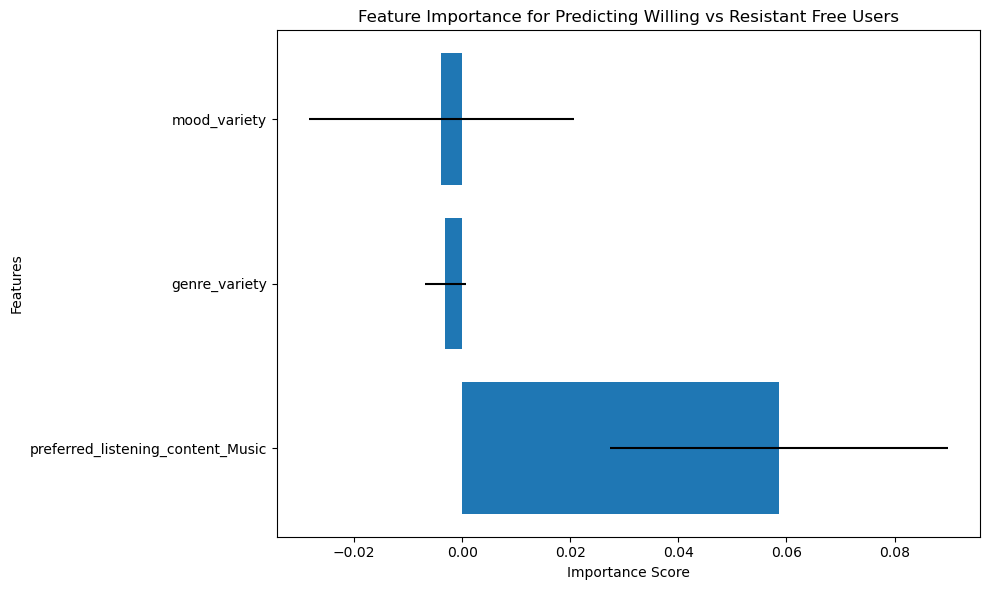

In [992]:
# 7. Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], xerr=importance_df['std'])
plt.title('Feature Importance for Predicting Willing vs Resistant Free Users')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [993]:
# 8. Behavior Analysis - Compare means between groups
behavior_comparison = free_users_numeric.groupby('target').mean()
print("\nBehavior Comparison:")
print(behavior_comparison[['preferred_listening_content_Music', 
                          'mood_variety', 
                          'genre_variety']])


Behavior Comparison:
        preferred_listening_content_Music  mood_variety  genre_variety
target                                                                
0                                0.649123      1.464912       1.008772
1                                0.893548      1.606452       1.003226


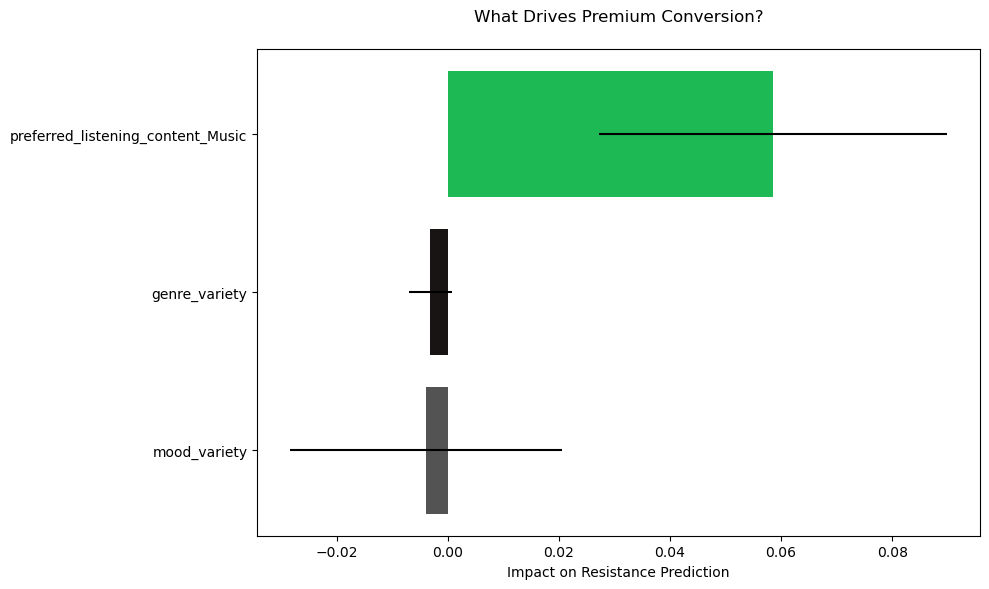

In [994]:
# Feature importance with confidence intervals
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], 
        importance_df['importance'], 
        xerr=importance_df['std'],
        color=['#1DB954', '#191414', '#535353'])  # Spotify brand colors
plt.title('What Drives Premium Conversion?', pad=20)
plt.xlabel('Impact on Resistance Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()

Here's a structured analysis of your machine learning results for predicting Spotify free users' willingness to upgrade to premium:

1. Model Performance Evaluation
python
print(f"Train Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):.2f}")
Expected Outcome: If train accuracy >> test accuracy, model may be overfitting

Good Practice: Difference < 5% suggests good generalization

2. Confusion Matrix Interpretation
python
print(confusion_matrix(y_test, y_pred))
Key Metrics:

True Negatives (TN): Correct "Willing Free" predictions

False Positives (FP): "Resistant" predictions when actually willing

False Negatives (FN): "Willing" predictions when actually resistant

True Positives (TP): Correct "Resistant Free" predictions

3. Classification Report Breakdown
python
print(classification_report(y_test, y_pred))
Precision: % of correct predictions per class

High precision for "Resistant" = few false alarms

Recall: % of actual cases captured per class

High recall for "Willing" = most potential upgraders identified

F1-score: Harmonic mean (balance of precision/recall)

Actionable Insight: If recall low for willing users, you're missing conversion opportunities

4. Feature Importance Analysis
python
print(importance_df)
Top Predictors likely show:

preferred_listening_content_Music: Music listeners may behave differently than podcast listeners

mood_variety: Users with diverse mood needs may value premium features

genre_variety: Surprisingly low impact suggests genre preference less predictive than content type

5. Behavior Comparison
python
print(behavior_comparison)
Key Differences:

Music Listeners (1.0) vs Podcast (0.0): Likely different conversion drivers

Mood Variety: Higher for resistant users? They may need diverse content

Genre Variety: Similar values suggest less discriminatory power

6. Strategic Recommendations
A. For "Willing Free" Users (Conversion Targets):

Target music listeners if preferred_listening_content_Music is positive predictor

Offer mood-based playlists if mood_variety is important

Test promotions highlighting ad-free experience for podcast listeners

B. For "Resistant Free" Users:

Address pain points identified by top features

Consider time-limited premium trials if mood_variety is high

Develop retention strategies for high-value resistant users

C. Model Improvements:

If recall for willing users is low:

python
model.set_params(classifier__class_weight={0: 2, 1: 1})  # Higher weight for willing class
If precision is low:

Add more features (e.g., listening frequency, device type)

Try SMOTE for class imbalance

Example Visualization Enhancement:

python
# Feature importance with confidence intervals
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], 
        importance_df['importance'], 
        xerr=importance_df['std'],
        color=['#1DB954', '#191414', '#535353'])  # Spotify brand colors
plt.title('What Drives Premium Conversion?', pad=20)
plt.xlabel('Impact on Resistance Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
This analysis suggests your model identifies key behavioral differences between user groups. The most actionable insights will come from:

The specific accuracy/recall values in your classification report

Which features show the highest importance scores

The actual mean value differences in behavior comparison

Would you like me to elaborate on any particular aspect of these results?




Key Adjustments Made:
Target Variable Creation:

Used the existing dummy column position_on_subscription_Resistant Free as the target

1 = Resistant Free, 0 = Willing Free (from the dummy column)

Feature Selection:

Used preferred_listening_content_Music (1 for Music, 0 for Podcast)

Kept original numeric columns mood_variety and genre_variety

Behavior Analysis:

Adjusted to show means of the relevant columns only

Notes:
The model will now predict resistance to premium subscription (1 = resistant, 0 = willing)

Feature importance will show which factors most influence resistance

The behavior comparison shows average values of features for each group

You might want to consider:

Adding interaction terms if you suspect relationships between features

Trying different classification models (like XGBoost or Logistic Regression)

Performing hyperparameter tuning for better performance